In [3]:
#Подготовив наши данные
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics

dataset = pd.read_csv('data_banknote_authentication.txt', header=None).values
money_attr = dataset[:, 0:-1]
money_attr = money_attr[:, :2]
money_attr = money_attr.astype(np.float64)
money_class = dataset[:, -1]
money_class = money_class.astype(np.int64, copy=False)


Точность классификации для SVC with linear kernel :
87.54%
Точность классификации для LinearSVC (linear kernel) :
88.63%
Точность классификации для SVC with rbf kernel :
94.02%
Точность классификации для SVC with sigmoid kernel :
38.56%


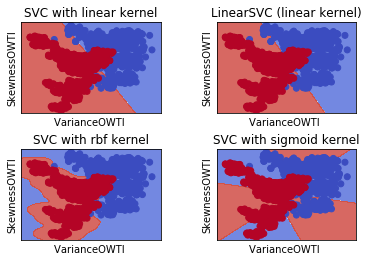

In [4]:
#Выясним, какая функция ядра обеспечивает налучшую точность классификации, при этом зафиксируем параметр C = 1.0
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(money_attr, money_class)
lin_svc = svm.LinearSVC(C=C).fit(money_attr, money_class)
rbf_svc = svm.SVC(kernel='rbf', C=C).fit(money_attr, money_class)
sigmoid_svc = svm.SVC(kernel='sigmoid', C=C).fit(money_attr, money_class)
titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with rbf kernel',
              'SVC with sigmoid kernel']

h = .02  # Шаг сетки
x_min, x_max = money_attr[:, 0].min() - 1, money_attr[:, 0].max() + 1
y_min, y_max = money_attr[:, 1].min() - 1, money_attr[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # заголовки для графиков
titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with rbf kernel',
              'SVC with sigmoid kernel']
for i, clf in enumerate((svc, lin_svc, rbf_svc, sigmoid_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(money_attr[:, 0], money_attr[:, 1], c=money_class, cmap=plt.cm.coolwarm)
    plt.xlabel('VarianceOWTI ')
    plt.ylabel('SkewnessOWTI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    pred = clf.predict(money_attr)
    print('Точность классификации для', titles[i], ':')
    print('{:.2%}'.format(metrics.accuracy_score(money_class, pred)))

plt.show()

In [13]:
#Видно что лидером из 4-х конурсантов является SVC with rbf! 
#Подберем оптимальную величину C для улучшения точности классификации

Точность классификации для rbf C=1 :
94.02%
Точность классификации для rbf C=100 :
95.77%
Точность классификации для rbf C=10000 :
96.87%
Точность классификации для rbf C=100000 :
97.30%


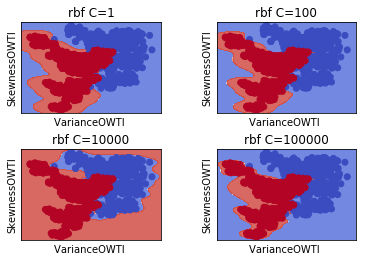

In [16]:
rbf_svc_c1 = svm.SVC(kernel='rbf', C=1).fit(money_attr, money_class)
rbf_svc_c100 = svm.SVC(kernel='rbf', C=100).fit(money_attr, money_class)
rbf_svc_c10000 = svm.SVC(kernel='rbf', C=10000).fit(money_attr, money_class)
rbf_svc_c100000 = svm.SVC(kernel='rbf', C=100000).fit(money_attr, money_class)
# заголовки для графиков
titles = ['rbf C=1',
          'rbf C=100',
          'rbf C=10000',
          'rbf C=100000']

#вычислим точность классификации и построим граффики
for i, clf in enumerate((rbf_svc_c1, rbf_svc_c100, rbf_svc_c10000, rbf_svc_c100000)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(money_attr[:, 0], money_attr[:, 1], c=money_class, cmap=plt.cm.coolwarm)
    plt.xlabel('VarianceOWTI ')
    plt.ylabel('SkewnessOWTI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    pred = clf.predict(money_attr)
    print('Точность классификации для', titles[i], ':')
    print('{:.2%}'.format(metrics.accuracy_score(money_class, pred)))

plt.show()

In [17]:
#Очевидно что с увеличением параметра С растет и точность классификации
#Теперь проверим, как влияет ширина ядра gamma на точность классификации 

Точность классификации для rbf gamma=0.1 :
93.59%
Точность классификации для rbf gamma=10 :
97.16%
Точность классификации для rbf gamma=100 :
99.49%
Точность классификации для rbf gamma=1000 :
99.93%


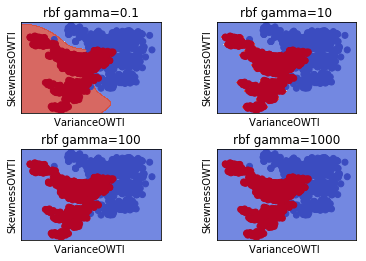

In [21]:
rbf_svc_g01 = svm.SVC(kernel='rbf', gamma=0.1).fit(money_attr, money_class)
rbf_svc_g10 = svm.SVC(kernel='rbf', gamma=10).fit(money_attr, money_class)
rbf_svc_g100 = svm.SVC(kernel='rbf', gamma=100).fit(money_attr, money_class)
rbf_svc_g1000 = svm.SVC(kernel='rbf', gamma=1000).fit(money_attr, money_class)
# заголовки для графиков
titles = ['rbf gamma=0.1',
          'rbf gamma=10',
          'rbf gamma=100',
          'rbf gamma=1000']
for i, clf in enumerate((rbf_svc_g01, rbf_svc_g10, rbf_svc_g100, rbf_svc_g1000)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(money_attr[:, 0], money_attr[:, 1], c=money_class, cmap=plt.cm.coolwarm)
    plt.xlabel('VarianceOWTI ')
    plt.ylabel('SkewnessOWTI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    pred = clf.predict(money_attr)
    print('Точность классификации для', titles[i], ':')
    print('{:.2%}'.format(metrics.accuracy_score(money_class, pred)))

plt.show()

In [25]:
#Видно, что при увеличении gamma увеличивается и точность классификации. При Gamma=1000 точность составила почти 100%
#Для данного набора данных наиболее оптимальным будет использование SVC with rbf с шириной ядра gamma > 100.

TypeError: __init__() got an unexpected keyword argument 'С'